# Sistemas Inteligentes

## Laboratório 5 - Otimização

Aplicação de __Algoritmo Genético__ na solução do problema __OneMax__, que visa encontrar uma solução com a maior quantidade possível de números iguais a 1.

Será explorada a biblioteca __DEAP__.

### Identificação do Aluno

#### Nome Completo

ESCREVA AQUI A SUA RESPOSTA

#### RA

ESCREVA AQUI A SUA RESPOSTA

### Configuração do Notebook

In [98]:
%matplotlib inline

## Desenvolvimento

### Importações

Importe:
- a biblioteca __random__
- e os pacotes _base_, _creator_, _tools_ e _algorithms_ da biblioteca __deap__
- a biblioteca __numpy__ como __np__
- o pacote __matplotlib.pyplot__ como __plt__

Obs: dependendo das versões dos pacotes, pode ser exibido um aviso sobre uma possível lentidão, mas esse aviso pode ser ignorado por enquanto.

In [99]:
import random
from deap import creator, base, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

Abaixo estão algumas configurações sobre os gráficos deste Notebook.

In [100]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)
plt.style.use('seaborn-notebook')

### Criação do Tipo

Crie os tipos:
- FitnessMax
- Individual

Para criar, utilize a função __create__ do módulo ___creator___. Os argumentos são os seguintes:
- o primeiro argumento da função é o nome do tipo a ser criado;
- o segundo argumento é a classe base da qual o novo tipo criado deve herdar;
- os demais argumentos, que são opcionais, são membros a serem adicionados ao novo tipo.

Para o tipo "FitnessMax", herde de __base.Fitness__ e adicione o atributo de pesos __weights=(1.0,)__.

Para o tipo "Individual", herde de __list__ e adicione o atributo __fitness=creator.FitnessMax__, que é justamente o que acabou de ser criado.

Obs: pesos e quaisquer outros valores retornados de funções criadas com a biblioteca DEAP devem ser iteráveis; por isso, inclua a vírgula ao final do último valor de saída para esses casos.

In [101]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

C:\Users\Lucas\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Lucas\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Apenas para fins didáticos, dado que não é algo necessário para rodar o código, crie um indivíduo chamado __ind__ com a função __creator.Individual__ recém criada. Utilize como argumento dessa função uma lista qualquer, de pelo menos 4 posições, apenas com valores 0 e 1; então, imprima a lista, o tipo da lista e o tipo do objeto __ind.fitness__.

In [102]:
ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


### Criação da Toolbox

A Toolbox armazena funções com seus respectivos argumentos utilizando apelidos para uso simplificado no algoritmo. Para criar a Toolbox, utilize a função __base.Toolbox__.

Para registrar as funções com seus apelidos, utilize a função __toolbox.register__ e seus argumentos são os seguintes:
- o primeiro, obrigatório, é o apelido;
- o segundo, obrigatório, é a função à qual o apelido será associado;
- os demais, opcionais, são argumentos a serem utilizados quando a função for chamada pelo apelido no algoritmo.

O primeiro apelido, "attr_bool", chama a função __random.randint__ com os argumentos 0 e 1 para sortear valores no intervalo [0, 1], ou seja, os valores serão apenas 0 ou 1. Você pode pensar nisso como bits.

O segundo apelido, "individual", chama a função __tools.initRepeat__ para preencher uma classe Individual com o que é produzido por 10 chamadas da função __toolbox.attr_bool__, que acabou de ser criada.

O terceiro apelido, "population", chama novamente a funçã0 __tools.initRepeat__ para fazer listas com base nos resultados da função __toolbox.individual__, apelidada anteriormente.

In [128]:
toolbox = base.Toolbox()
def randBit():
    a = random.randint(0,1)
    return a

toolbox.register("attr_bool", randBit)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Agora execute o bloco a seguir para verificar o funcionamento das funções apelidadas com a Toolbox criada.

In [129]:
bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <class 'int'> and has value
0
ind is of type <class 'deap.creator.Individual'> and contains 10 bits
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
pop is of type <class 'list'> and contains 3 individuals
[[1, 0, 0, 1, 1, 1, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 1, 1, 0, 1, 1]]


### Função de Avaliação

Para o caso do problema OneMax, trata-se de uma função bastante simples, dado que apenas conta a quantidade de números 1 em um indivíduo. Chame a função de __evalOneMax__, que terá apenas um argumento, o indivíduo.

Obs: lembre-se de que o valor retornado precisa ser iterável, então finalize a saída com uma vírgula.

In [130]:
def evalOneMax(individual):
    return sum(individual),
res = evalOneMax(ind)

### Operadores Genéticos

Vamos registrar alguns operadores com apelidos que facilitem sua utilização futuramente, da mesma forma que foi feito na criação da Toolbox. Serão 4 ao todo.

A primeira, "evaluate", refere-se à função de avaliação __evalOneMax__; como é uma função de apenas um único argumento, não é necessário atribuir nada por agora, já que isso será feito depois, quando for necessário.

A segunda, "mate", refere-se à função de _Crossover_ de dois pontos __tools.cxTwoPoint__, que também não precisa de argumentos extras por enquanto.

A terceira, "mutate", refere-se à função de mutação __tools.mutFlipBit__, que provoca mutações; recomenda-se utilizar o argumento __indpb=0.10__ para import 10% de chance de mutação a cada atributo.

A quarta, "select", é o operador de seleção __toolbox.selTournament__; utilize o argumento __tournsize=3__.

In [131]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

Apenas para testar a funcionalidade, crie um indivíduo chamado __ind__, imprima-o na tela, então cause uma mutação em __ind__ e exiba o resultado após a mutação.

In [132]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 1, 0, 1, 1]


É importante destacar o fato de que os operadores podem fazer modificações nos indivíduos, ou seja, caso não seja feita uma cópia do indivíduo, os indivíduos anteriores podem se perder.

Para salvar os indivíduos, pode-se utilizar a função __toolbox.clone__, já presente em qualquer toolbox, com o argumento sendo o indivíduo a ser copiado, assim como é feito na célula abaixo.

In [133]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


### Evoluindo a População

Defina a função __main__, onde será feita toda a parte principal do programa. As declarações anteriores estão guardadas globalmente neste Notebook, logo, podem ser utilizadas desde então.

O programa principal, basicamente, gera uma população e a utiliza no algoritmo para evoluir a uma solução.

Assim, crie uma população chamada __pop__ utilizando a função __toolbox.population__ com 50 indivíduos, ou seja, __n=50__ como argumento; e crie um Hall da fama chamado __hof__ com o uso da função __tools.HallOfFame(1)__.

Para preparar as estatísticas, que também devem fazer parte da definição da função __main__, crie um objeto chamado __stats__ e atribua a ele a função __tools.Statistics__ com a função lambda __lambda ind: ind.fitness.value__ como argumento.

Com o objeto __stats__ criado, registre nele as funções de média, mínimo e máximo (da biblioteca __numpy__) com os seguintes respectivos nomes: "avg", "min" e "max".

Agora, atribuindo às variáveis __pop__ e __logbook__, utilize a função __algorithms.eaSimple__ (de duas saídas) com os seguintes argumentos de entrada:
- a população, __pop__
- a toolbox, __toolbox__
- o ponto (percentual) separador de Crossover, __cxpb=0.5__
- a probabilidade de mutação de cada atributo, __mutpb=0.2__
- o número de gerações, __ngen=10__
- o objeto de estatísticas, __stats=stats__
- o objeto de Hall da fama, __halloffame=hof__
- o argumento de impressão completa por iteração, __verbose=True__

A saída da função __main__ deve ser composta por __pop__, __logbook__ e __hof__.

In [137]:
def main():
    pop = tb.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    
    stats.register("avg", np.mean)
    stats.register("min", np.amin)
    stats.register("max", np.amax)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

Use o código a seguir para calcular os resultados e exibí-los.

gen	nevals	avg 	min	max
0  	100   	4.86	0  	9  
1  	66    	6.21	4  	9  
2  	71    	7.33	2  	10 
3  	49    	8.13	4  	10 
4  	60    	8.79	5  	10 
5  	63    	9.09	6  	10 
6  	65    	9.47	6  	10 
7  	61    	9.73	7  	10 
8  	62    	9.8 	7  	10 
9  	65    	9.74	7  	10 
10 	62    	9.85	6  	10 
Best individual is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
with fitness: (10.0,)


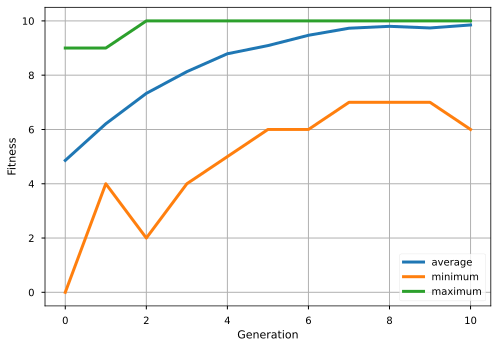

In [138]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average", linewidth=3)
    plt.plot(gen, min_, label="minimum", linewidth=3)
    plt.plot(gen, max_, label="maximum", linewidth=3)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()